# Fraunhofer Diffraction (by Python)

#### import packages

In [1]:
import numpy as np
π = np.pi

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# packages for interaction in Jupyter notebook
from ipywidgets import interact
import ipywidgets as widgets

#### define the `Fraunhofer` function

In [2]:
def Fraunhofer(λ, a,d, N, show_envelope,scale):
    
    # parameters
    λ = λ *10**(-9)
    a = a *10**(-6)
    d = d * a
    
    s = np.linspace(-1,1,num=2000) # s=sin(θ)
    # fringe of single-slit diffraction
    α = π * a * s / λ
    envelope = ( np.sin(α) / α )**2
    # fringe of multi-slit diffraction
    γ = π * d * s / λ
    fringe = envelope * ( np.sin(N*γ) / np.sin(γ) )**2
    envelope = envelope * N**2
    
    # plot
    if scale: # scale the intensity to make secondary bright fringes more visible
        envelope = np.sqrt(envelope)
        fringe = np.sqrt(fringe)
    if show_envelope:
        plt.plot(s,envelope, color="tab:gray",linewidth=1)
    plt.plot(s,fringe, color="tab:blue")
    plt.xlabel(r"$\sin\ \theta}$")
    plt.ylabel("Intensity")
    plt.show()

#### plot a static figure

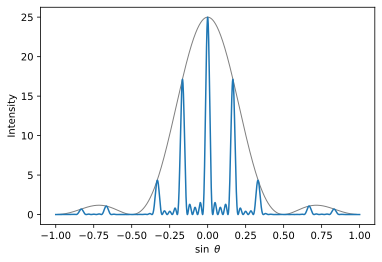

In [3]:
Fraunhofer(500, 1,3, 5, True,False)

#### create an interactive interface

In [ ]:
interact(Fraunhofer, 
    λ =   widgets.IntSlider(min=400,max=800,step=50 ,value=500, description=r"$\lambda\ \mathrm{(nm)}$"),
    a =   widgets.IntSlider(min=1  ,max=5  ,step=1  ,value=1  , description=r"$a\ \mathrm{(μm)}$"      ),
    d = widgets.FloatSlider(min=1  ,max=5  ,step=1/2,value=3  , description=r"$d/a$"                   ),
    N =   widgets.IntSlider(min=1  ,max=10 ,step=1  ,value=5                                           ),
    show_envelope = widgets.Checkbox(value=True , description="show envelope"),
    scale =         widgets.Checkbox(value=False, description="scale"        )
);